# 单变量线性回归

预测函数$h_\theta \left( x \right)=\theta_{0}+\theta_{1}x$

线性回归的目的就是拟合${\theta}$, 使得代价函数最小

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. 读取数据

In [2]:
# load data from file and see what it is like
data = pd.read_csv('ex1data1.txt', names=['population', 'profit']) # read data from csv and add column names
data.info() # see data format
data.head() # see first five rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 可视化数据

从图中看出, 散点分布基本在在一条直线上. 因此考虑线性回归

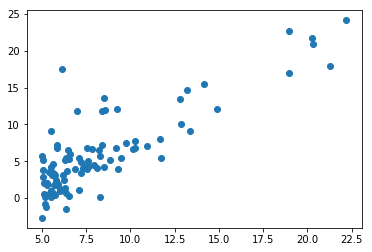

In [3]:
# plot data
plt.scatter(data.population, data.profit)

### 定义要用到的函数

In [4]:
def get_X(df): 
    """Add bias unit to dataset and return as a whole"""
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # add bias unit
    data = pd.concat([ones, df], axis=1)  # concatenate bias feature and other features
    return data.iloc[:, :-1].as_matrix()  # this line of code returns ndarray, not matrix


def get_y(df):
    """Get predictions of the dataset, assume that the last column is the target"""  
    return np.array(df.iloc[:, -1]) # df.iloc[:, -1] means the last column of df


## 2. 准备数据

In [5]:
# see the shape and datatype of trainning data
X = get_X(data) 
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y)) 

# initialize theta
theta = np.zeros(X.shape[1]) # X.shape[1]=2, denoting the number of features(bias unit included)

epoch = 500

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


C:\Users\Alex\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### 计算代价函数

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}x={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

使用向量化表示:
代价函数$J({\theta}) = \frac{1}{2m}{(X{\theta}-y)}^T(X{\theta}-y)$. 


In [6]:
def cost(theta, X, y):
    """
    Calculate the cost of given parameters
    
    Args:
        theta : R(n), parameters for linear regression
        X: R(m*n), m number of samples, n number of features
        y: R(m) predictions
    """
    m = X.shape[0] # number of samples

    inner = X @ theta - y  # R(m*1)，X @ theta is equivalent to X.dot(theta)

    # 1*m @ m*1 = 1*1 in matrix multiplication
    # but you know numpy didn't do transpose in 1d array, so here is just a
    # vector inner product to itselves
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)

    return cost

### 计算梯度

梯度的计算公式: ${{\theta }_{j}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}})}x_{j}^{(i)}$


使用向量化表示: 梯度$\frac{\partial}{{\partial}{\theta}}{J({\theta})}=\frac1mX^T(X{\theta} - y)$


In [7]:
def gradient(theta, X, y):
    """
    Calculate the gradient of each parameter
    """
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)，X @ theta is equivalent to X.dot(theta)

    return inner / m

### 梯度下降算法


batch gradient descent（批量梯度下降）

计算完所有样本的代价后, 根据平均值计算梯度值. 再更新${\theta}$.

更新梯度的公式: ${\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left(\theta \right)$


In [8]:
def batch_gradient_descent(theta, X, y, epoch, alpha=0.01):
    """
    Fit linear regression using batch gradient descent algorithm,
    return gradient and cost

    Args:
        theta : R(n), parameters for linear regression
        X: R(m*n), m number of samples, n number of features
        y: R(m) predictions
        epoch: number of iterations
        alpha: learning rate. default 0.01
    """
    cost_data = [cost(theta, X, y)]
    _theta = theta.copy()  # make a copy to avoid confusion

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(cost(_theta, X, y))

    return _theta, cost_data

## 3. 开始训练

[-2.28286727  1.03099898]


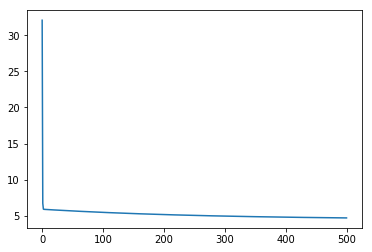

In [9]:
# fit parameters to minimize cost function
final_theta, cost_data = batch_gradient_descent(theta, X, y, epoch)

# theta after batch gradient descent
print(final_theta) 

# visualize cost function
plt.plot(np.arange(epoch+1), cost_data)
plt.show()

## 4. 看一看结果

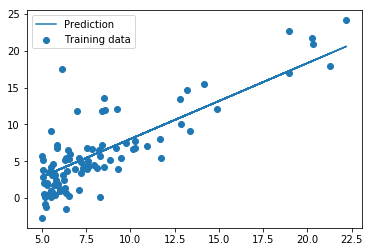

In [10]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()